# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n+1}{n}X_{(n)}$ и $2\overline{X}$.

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

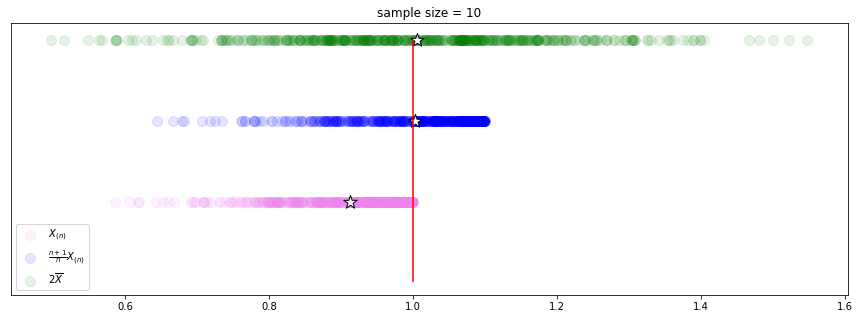

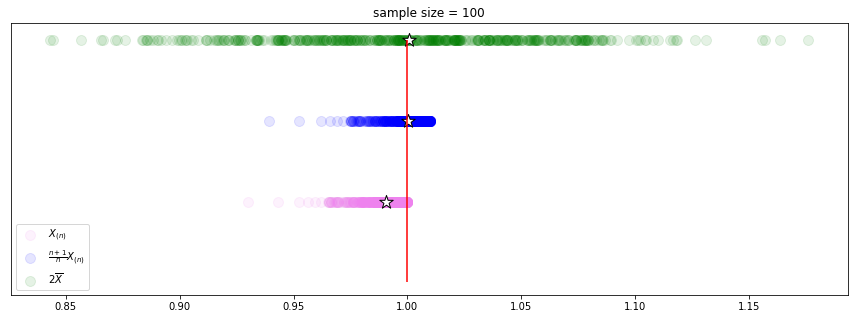

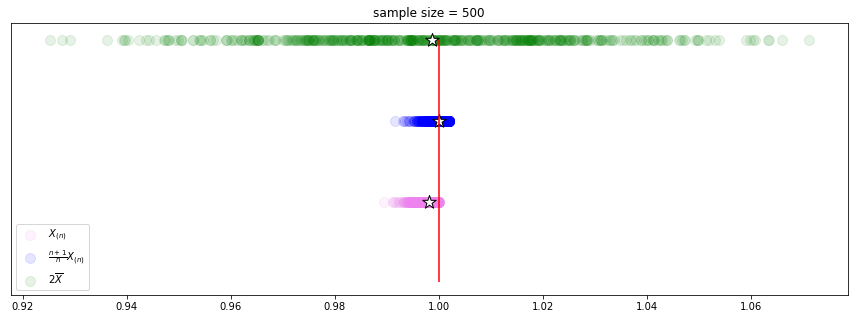

In [249]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

for n in [10, 100, 500]:
    plt.figure(figsize=(15, 5))
    l = sps.uniform.rvs(size=(n, 500))
    
    estim1 = l.max(axis=0)
    estim2 = estim1 * (n + 1) / n
    estim3 = 2 * l.mean(axis=0)
    
    plt.scatter(estim1, np.zeros_like(estim1) + 1, 
            alpha=0.1, s=100, color='violet', label='$X_{(n)}$')       
    plt.scatter(estim1.mean(), 1, marker='*', s=200, 
                color='w', edgecolors='black')
    
    plt.scatter(estim2, np.zeros_like(estim2) + 2, 
            alpha=0.1, s=100, color='blue', label='$\\frac{n+1}{n}X_{(n)}$')       
    plt.scatter(estim2.mean(), 2, marker='*', s=200, 
                color='w', edgecolors='black')
    
    plt.scatter(estim3, np.zeros_like(estim3) + 3, 
            alpha=0.1, s=100, color='green', label='$2\overline{X}$')       
    plt.scatter(estim3.mean(), 3, marker='*', s=200, 
                color='w', edgecolors='black')

    plt.vlines(1, 0, 3, color='r')
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend()
    plt.show()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $ES^2 = \frac{n-1}{n}\sigma^2$, $E\frac{n}{n-1}S^2=\sigma^2 \Rightarrow \frac{n}{n-1}S^2$ - несмещенная.

Для данной модели выполните те же действия, что и с предыдущей.

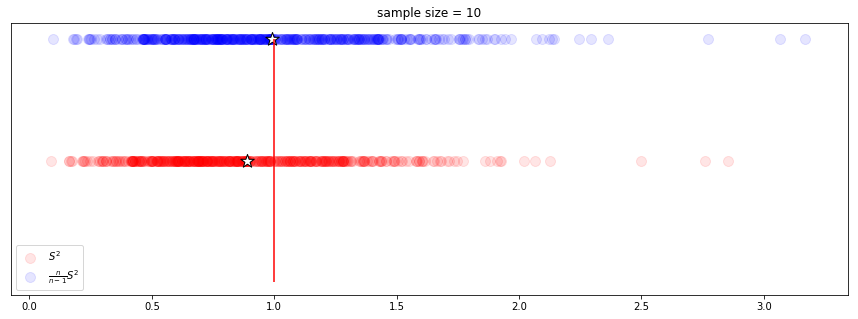

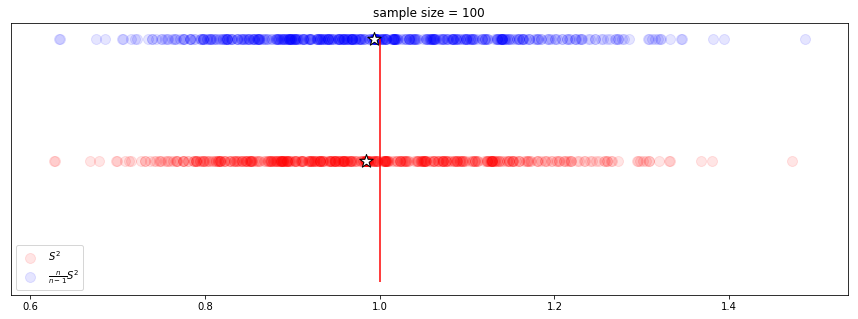

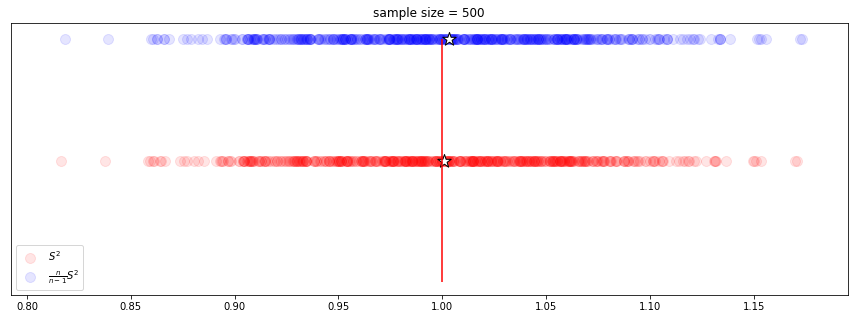

In [251]:
for n in [10, 100, 500]:
    plt.figure(figsize=(15, 5))
    l = sps.norm.rvs(size=(n, 500))
    
    estim1 = (l ** 2).mean(axis=0) - (l.mean(axis=0)) ** 2
    estim2 = estim1 * n / (n - 1)
   
    plt.scatter(estim1, np.zeros_like(estim1) + 1, 
            alpha=0.1, s=100, color='red', label='$S^2$')       
    plt.scatter(estim1.mean(), 1, marker='*', s=200, 
                color='w', edgecolors='black')
    
    plt.scatter(estim2, np.zeros_like(estim2) + 2, 
            alpha=0.1, s=100, color='blue', label='$\\frac{n}{n-1}S^2$')       
    plt.scatter(estim2.mean(), 2, marker='*', s=200, 
                color='w', edgecolors='black')    

    plt.vlines(1, 0, 2, color='r')
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend()
    plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Оценка несмещенная, когда ее математическое ожидание равно параметру распределения. Выше видно (особенно для малых выборок), что мат.ожидания оценок $S^2$ и $X_{(n)}$ не совпадают с 1 -- значением параметра.

При малых размерах выборки эксперимента вычисленное среднее значение выборки может сильно отличаться от реального. Поэтому используют несмещенную оценку $\sigma$, в знаменателе которой стоит $n-1$.

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

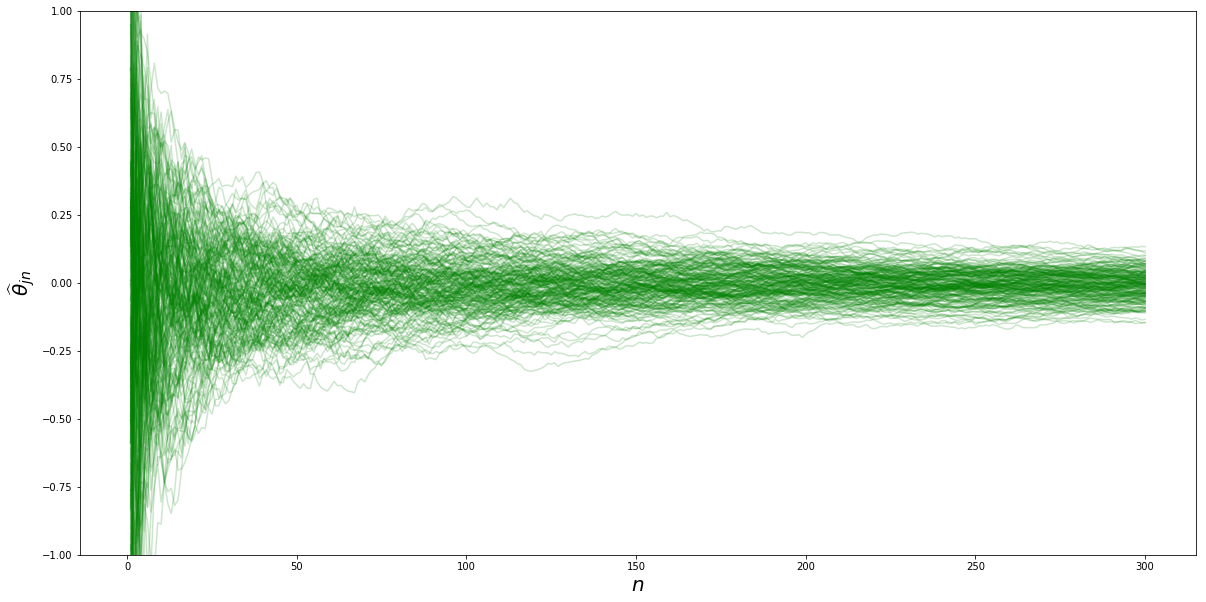

In [218]:
n = 200
m = 300
sample = sps.norm.rvs(size=(n, m))
estim = sample.cumsum(axis=1) / np.linspace(1, m, m)

plt.figure(figsize=(20, 10))
for j in range(n):
    plt.plot(np.linspace(1, m, m), estim[j], alpha=0.2, color='green')

plt.ylim((-1, 1))
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$\widehat{\theta}_{jn}$', fontsize=20)
plt.show()

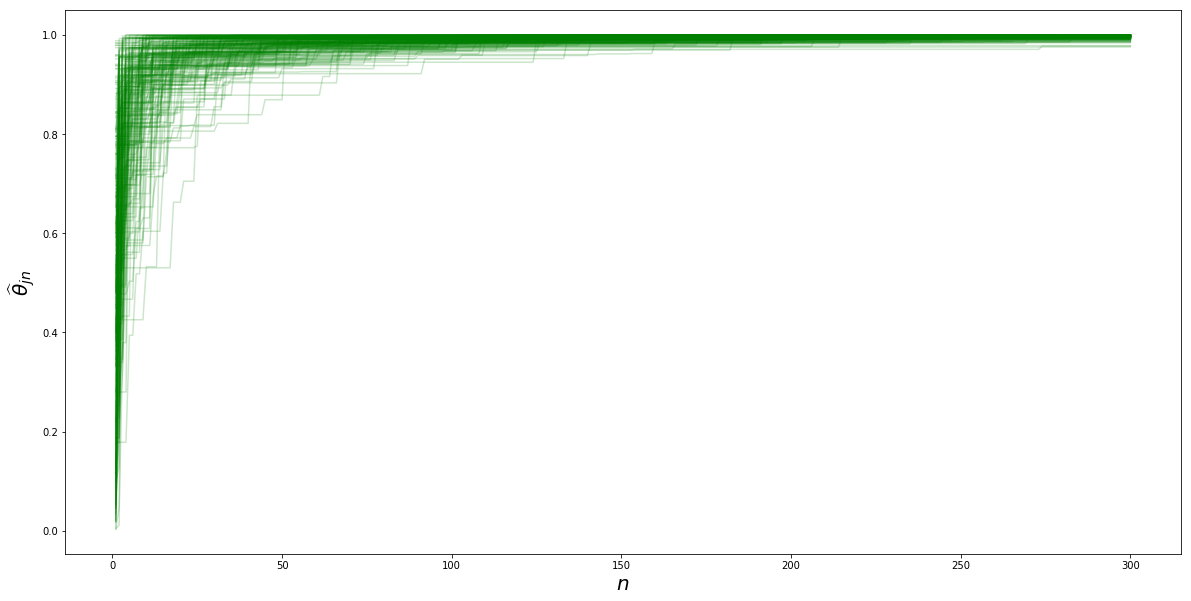

In [219]:
sample = sps.uniform.rvs(size=(n, m))

estim = np.maximum.accumulate(sample, 1)
plt.figure(figsize=(20, 10))
for j in range(n):
    plt.plot(np.linspace(1, m, m), estim[j], alpha=0.2, color='green')

plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$\widehat{\theta}_{jn}$', fontsize=20)
plt.show()

**Вывод:** Оценка состоятельна, если она стремится к параметру (когда размер выборки стремится к бесконечности). Видно, что в пункте а) оценки стремятся к 0, а в пункте б) -- к 1.

$EX_1 = 0$, при этом $\overline{X_n} \rightarrow 0$. Т.е., по закону больших чисел, $\overline {X_n} \rightarrow EX_1$.

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

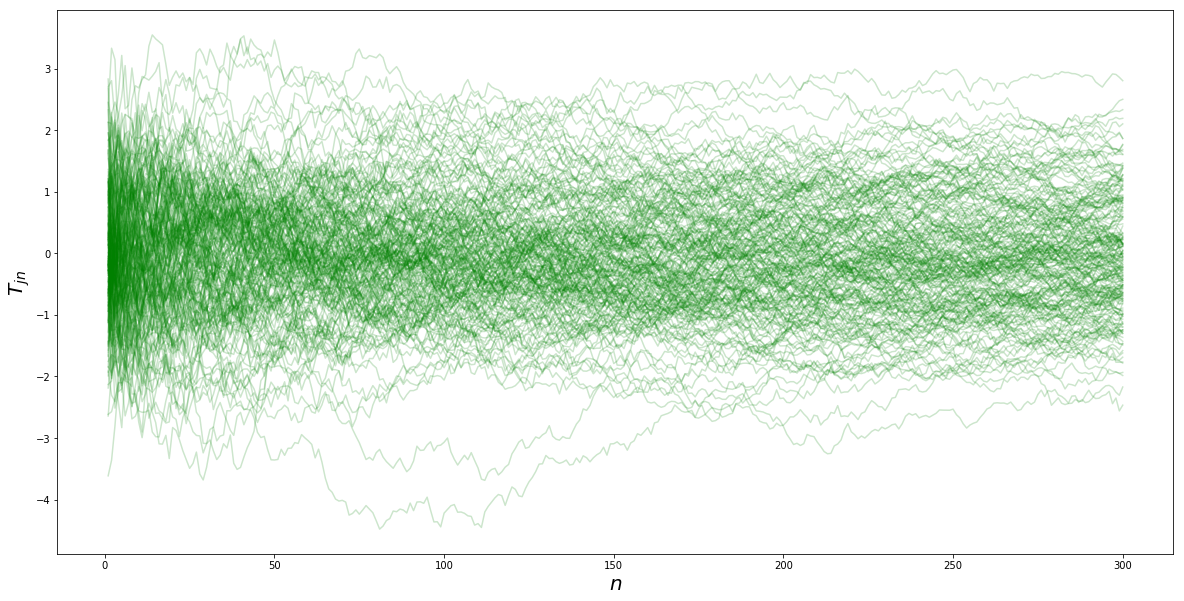

In [281]:
n = 200
m = 300
sample = sps.norm.rvs(size=(n, m))
estim = sample.cumsum(axis=1) / np.linspace(1, m, m)
T = estim * np.sqrt(np.linspace(1, m, m))

plt.figure(figsize=(20, 10))
for j in range(n):
    plt.plot(np.linspace(1, m, m), T[j], alpha=0.2, color='green')    

plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$T_{jn}$', fontsize=20)
plt.show()

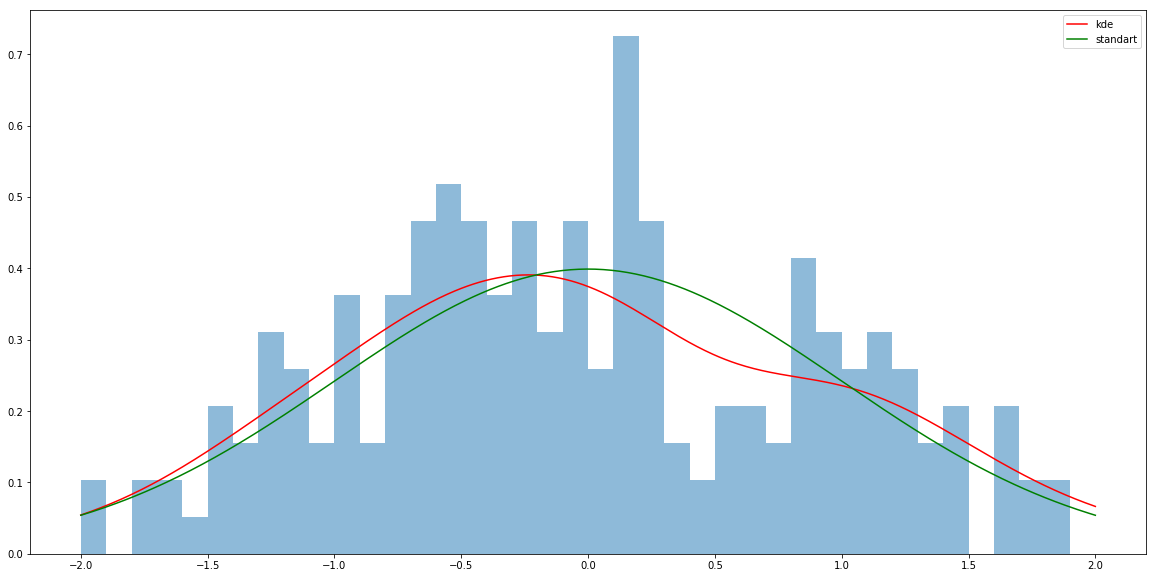

In [282]:
from statsmodels.nonparametric.kde import KDEUnivariate

plt.figure(figsize=(20, 10))
plt.hist(T[:, 299], bins=40, range=(-2, 2), normed=True, alpha=0.5)

kernel_density = KDEUnivariate(T[:, 299])
kernel_density.fit()
grid = np.linspace(-2, 2, 500)
plt.plot(grid, kernel_density.evaluate(grid), color='red', label='kde')
plt.plot(grid, sps.norm.pdf(grid), color='green', label='standart')
plt.legend()
plt.show()

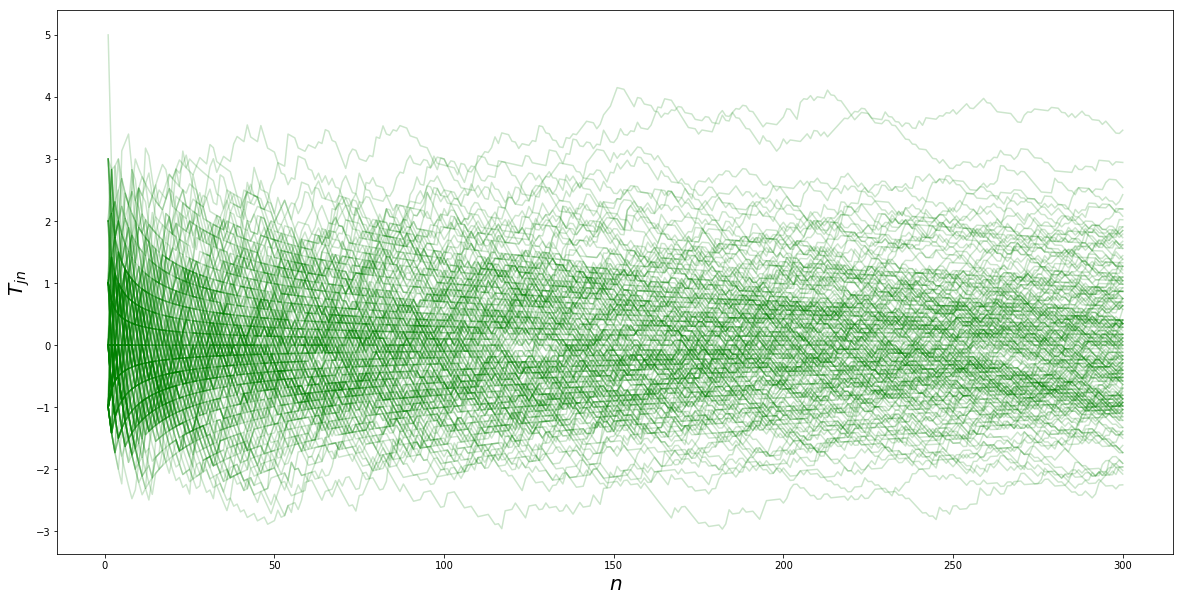

In [283]:
l = sps.poisson.rvs(1, size=(n, m))
estim = l.cumsum(axis=1) / np.linspace(1, m, m)
T = (estim - 1) * np.sqrt(np.linspace(1, m, m))

plt.figure(figsize=(20, 10))
for j in range(n):
    plt.plot(np.linspace(1, m, m), T[j], alpha=0.2, color='green')    

plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$T_{jn}$', fontsize=20)
plt.show()

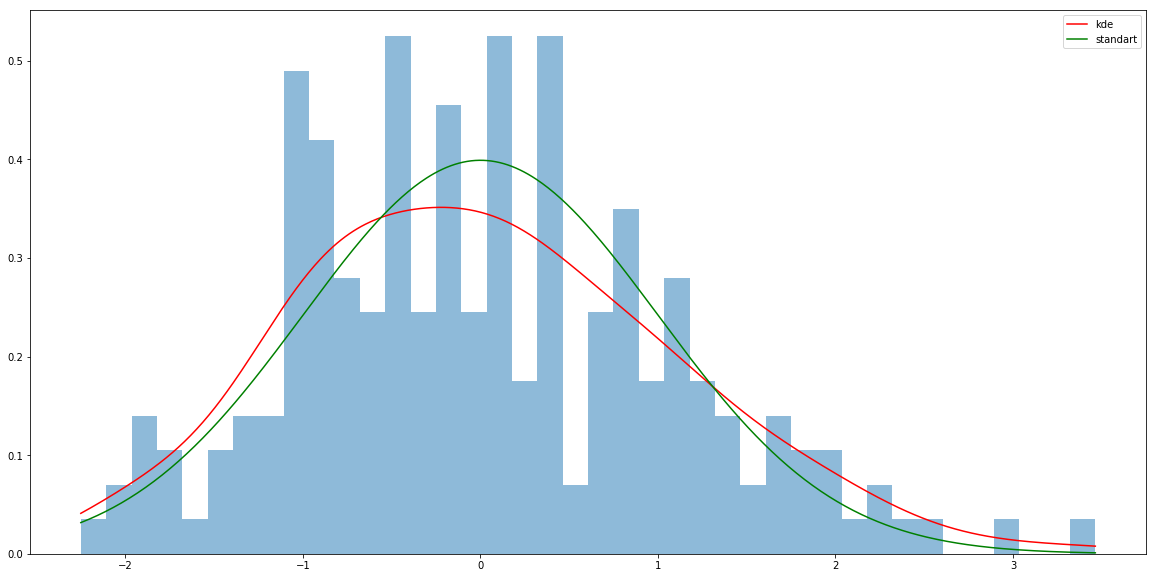

In [284]:
plt.figure(figsize=(20, 10))
plt.hist(T[:, 299], bins=40, 
         range=(T[:, 299].min(), T[:, 299].max()), normed=True, alpha=0.5)

kernel_density = KDEUnivariate(T[:, 299])
kernel_density.fit()
grid = np.linspace(T[:, 299].min(), T[:, 299].max(), 500)
plt.plot(grid, kernel_density.evaluate(grid), color='red', label='kde')
plt.plot(grid, sps.norm.pdf(grid), color='green', label='standart')
plt.legend()
plt.show()

**Вывод:** Асимптотически нормальная оценка удовлетворяет условию: $\sqrt{n}(\theta^*_n - \theta)$ стремится к случайной величине, имеющей нормальное распределение с параметрами $0$ и $\sigma^2$. Для доказательства этого условия часто используется ЦПТ.

На графиках видно, что график ядерной оценки плотности $T_{i, 300}$ похож на график плотности нормального распределения, что говорит об асимптотической нормальности оценки $\overline{X}$ для данных распределений.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

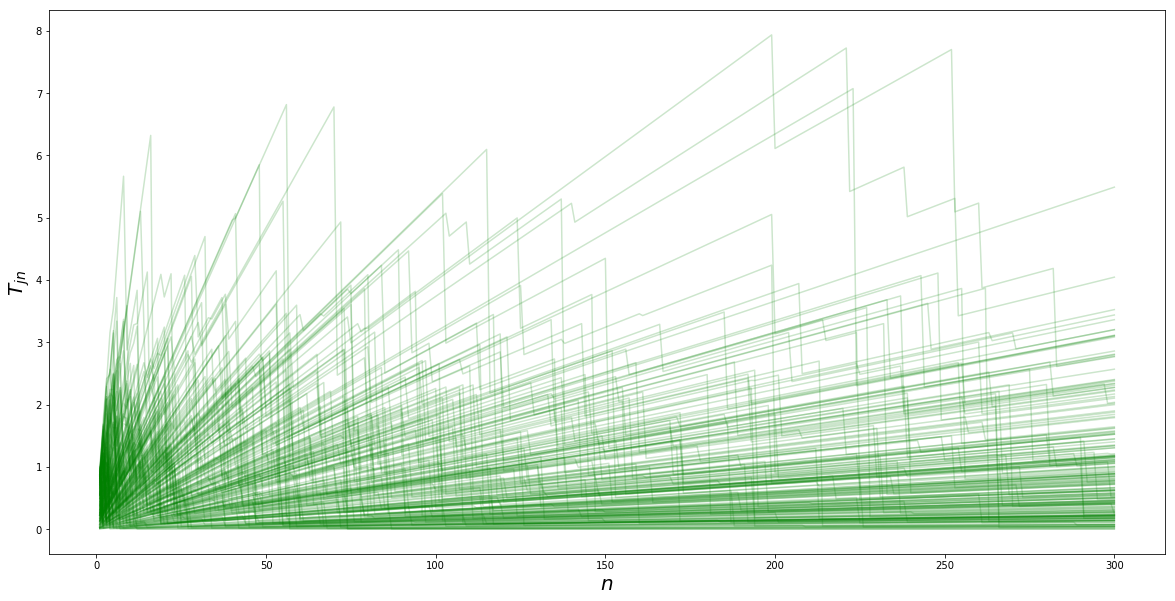

In [229]:
n = 200
m = 300
sample = sps.uniform.rvs(size=(n, m))
estim = np.maximum.accumulate(sample, 1)
T = (1 - estim) * np.linspace(1, m, m)

plt.figure(figsize=(20, 10))
for j in range(n):
    plt.plot(np.linspace(1, m, m), T[j], alpha=0.2, color='green')    
    
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$T_{jn}$', fontsize=20)
plt.show()

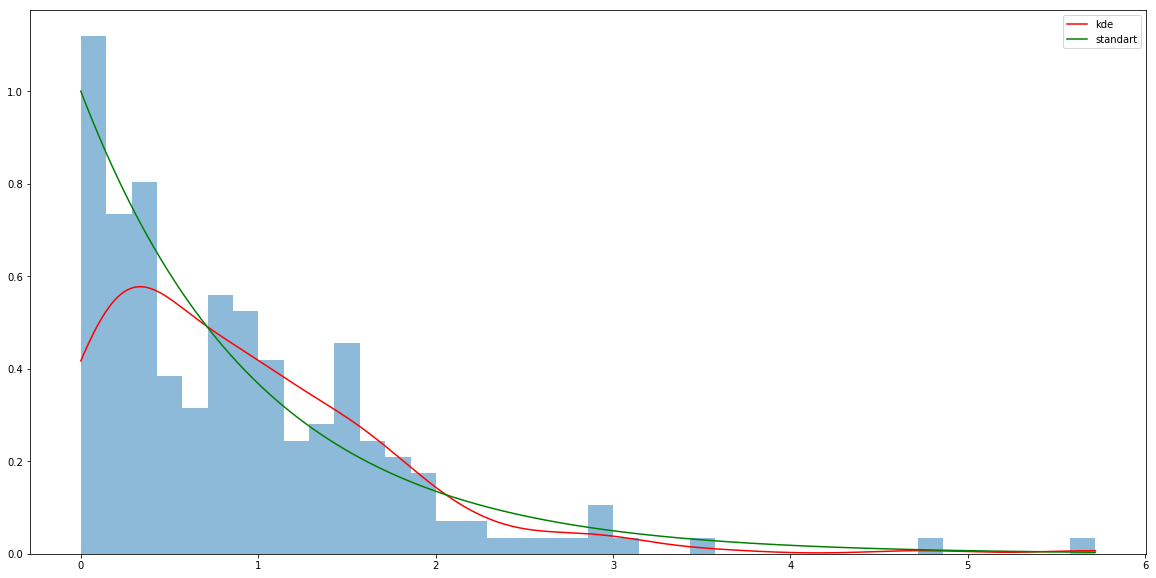

In [222]:
plt.figure(figsize=(20, 10))
plt.hist(T[:, 299], bins=40, 
         range=(T[:, 299].min(), T[:, 299].max()), normed=True, alpha=0.5)

kernel_density = KDEUnivariate(T[:, 299])
kernel_density.fit()

grid = np.linspace(T[:, 299].min(), T[:, 299].max(), 500)
plt.plot(grid, kernel_density.evaluate(grid), color='red', label='kde')
plt.plot(grid, sps.expon.pdf(grid), color='green', label='standart')
plt.legend()
plt.show()

**Вывод:** График ядерной оценки плотности $T_{i, 300}$ схож с графиком плотности распределения $Expon(1)$, что подтверждает утверждение, приведенное выше.

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [252]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)
        
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

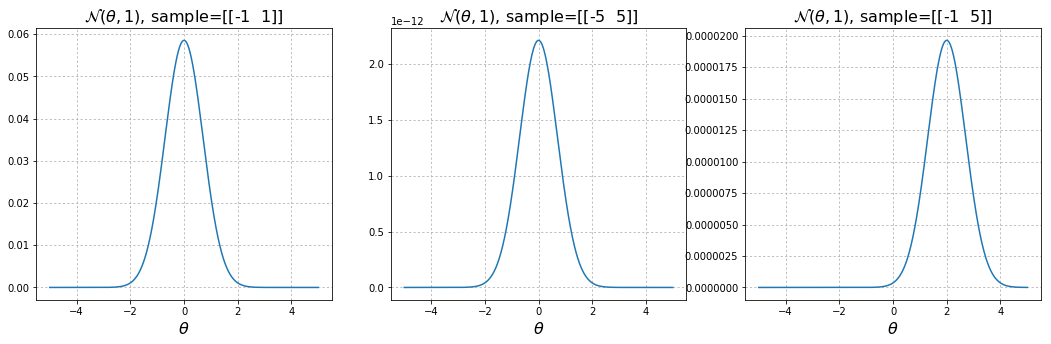

In [253]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

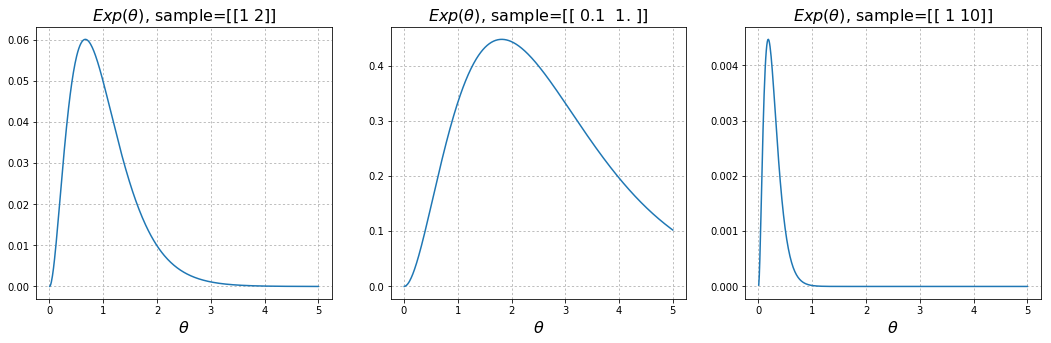

In [258]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

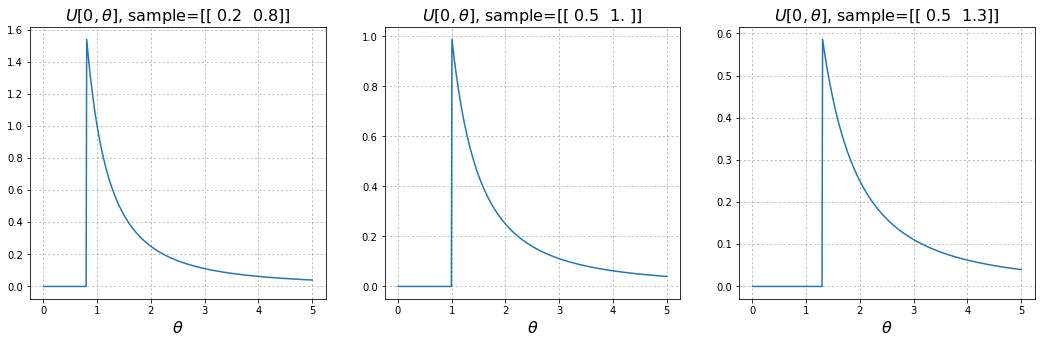

In [259]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

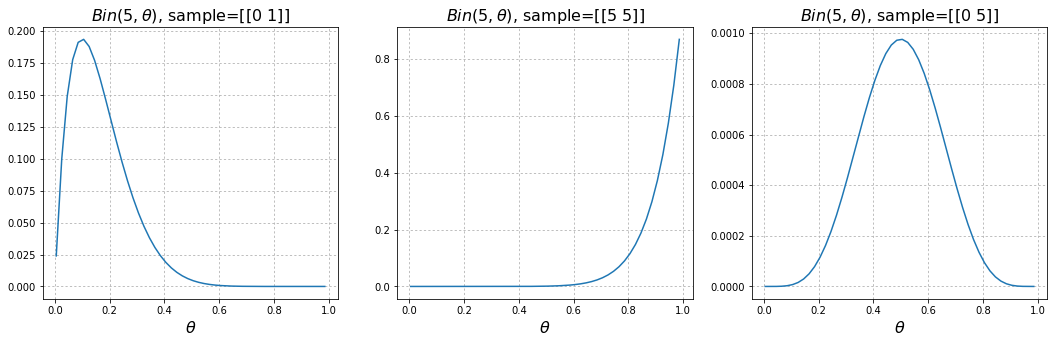

In [263]:
grid = np.linspace(-5, 15, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

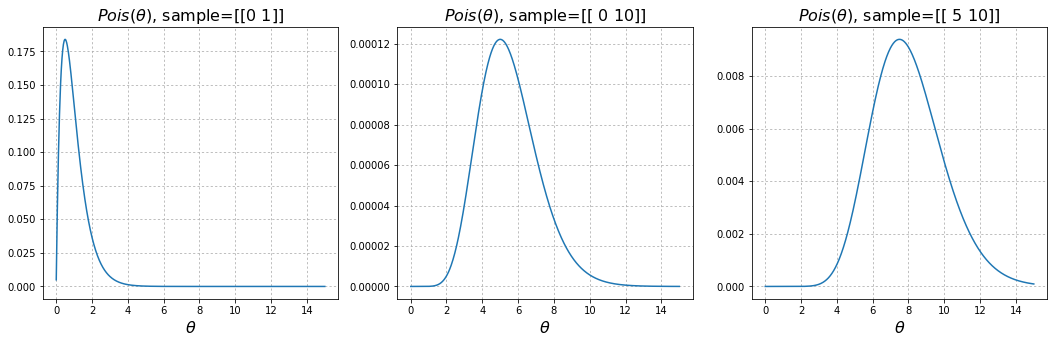

In [264]:
    grid = np.linspace(-5, 15, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

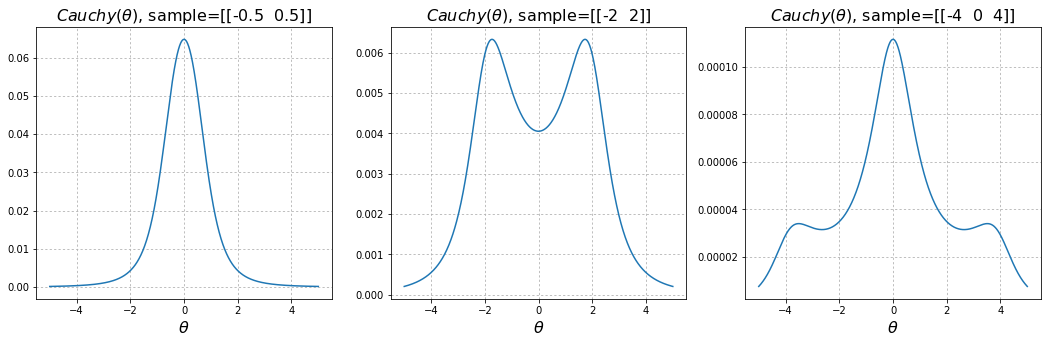

In [262]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')


Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** Функции правдоподобия различаются в зависимости от выборок, потому что строятся на их основе. Например, для равномерного распределения функция правдоподобия имеет пик в точке, равной наибольшему значению выборки.

Функция правдоподобия не является плотностью, т.к., опять же, строится на основе выборки. Это можно видеть на примере последних графиков для распределения Коши.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [223]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

**Решение:** Из-за того, что размер выборки очень большой, а значения плотности меньше 1, при их перемножении получается неизмеримо малое число, которое нельзя отследить. Поэтому вместо функции правдопободия можно посмотреть на ее логарифм.

In [224]:
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-142030.592707


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

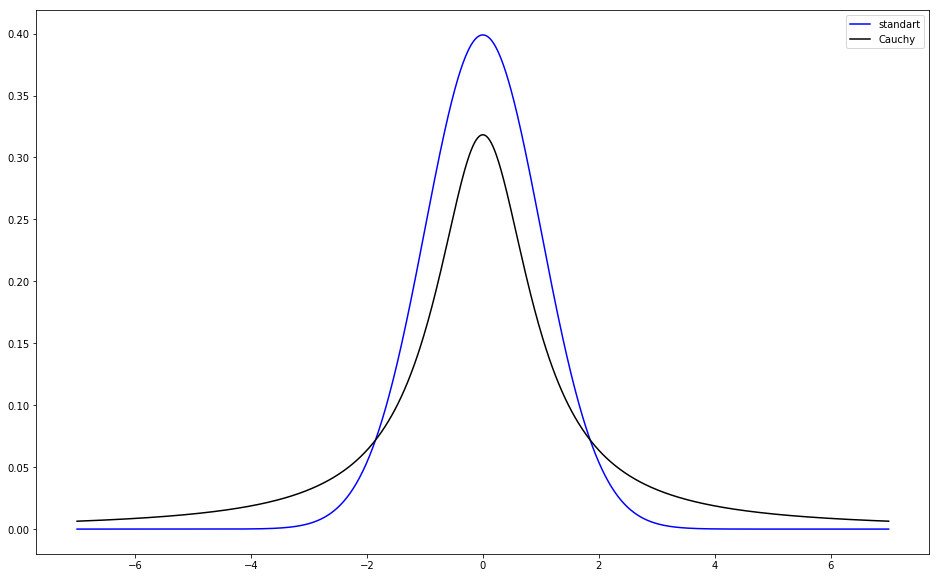

In [49]:
grid = np.linspace(-7, 7, 1000)
plt.figure(figsize=(16, 10))
plt.plot(grid, sps.norm.pdf(grid), color='blue', label='standart')
plt.plot(grid, sps.cauchy.pdf(grid), color='black', label='Cauchy')

plt.legend()
plt.show()

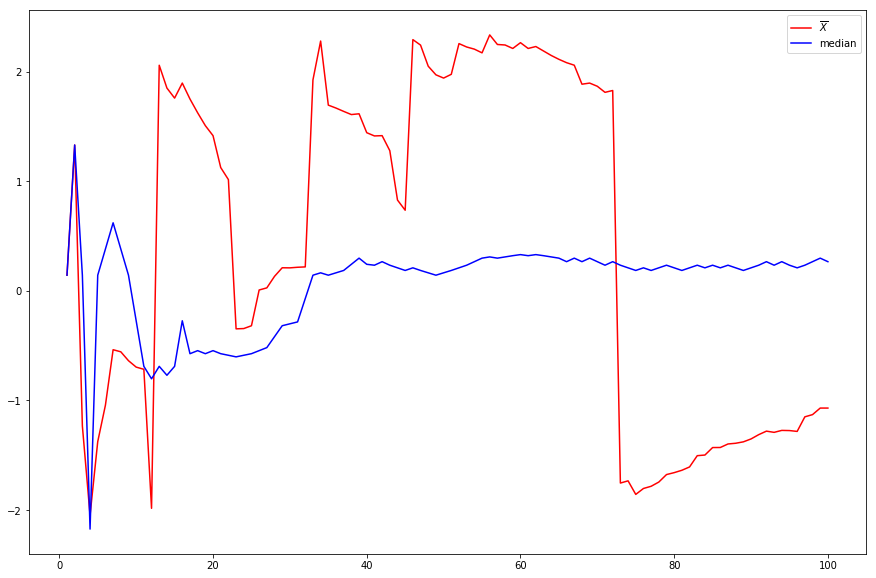

In [275]:
sample = sps.cauchy.rvs(size=100)
mean = sample.cumsum() / np.linspace(1, 100, 100)
median = [np.median(sample[:i + 1]) for i in range(100)]

plt.figure(figsize=(15,10))
plt.plot(np.linspace(1, 100, 100), mean, color='red', label='$\overline{X}$')
plt.plot(np.linspace(1, 100, 100), median, color='blue', label='median')
plt.legend()
plt.show()

**Вывод:** Плотности данных распределений похожи, но при этом асимптотически нормальные оценки различны. Мы знаем, что $\overline{X}$ является асимптотически нормальной для стандартного нормального распределения, но по графику видно, что она не стремится к 0 для выборки из распределения Коши. При этом медиана будет асимптотически нормальной для распределения Коши, т.к. она стремится к 0 при размере выборки, стремящимся к бесконечности.

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [ ]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

In [ ]:
...

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [246]:
n = 100
R1 = [[], [], [], []]
R2 = [[], [], [], []]
for tetta in np.arange(0.01, 2.01, 0.01):
    sample = sps.uniform.rvs(size=(n, 2000), scale=tetta)
    estim1 = 2 * sample.mean(axis=0)
    estim2 = (n + 1) * sample.min(axis=0)
    estim3 = sample.min(axis=0) + sample.max(axis=0)
    estim4 = (n + 1) * sample.max(axis=0) / n
    
    R1[0].append((np.absolute(estim1 - tetta)).sum() / 2000)
    R1[1].append((np.absolute(estim2 - tetta)).sum() / 2000)
    R1[2].append((np.absolute(estim3 - tetta)).sum() / 2000)
    R1[3].append((np.absolute(estim4 - tetta)).sum() / 2000)
    
    R2[0].append(((estim1 - tetta) ** 2).sum() / 2000)
    R2[1].append(((estim2 - tetta) ** 2).sum() / 2000)
    R2[2].append(((estim3 - tetta) ** 2).sum() / 2000)
    R2[3].append(((estim4 - tetta) ** 2).sum() / 2000)

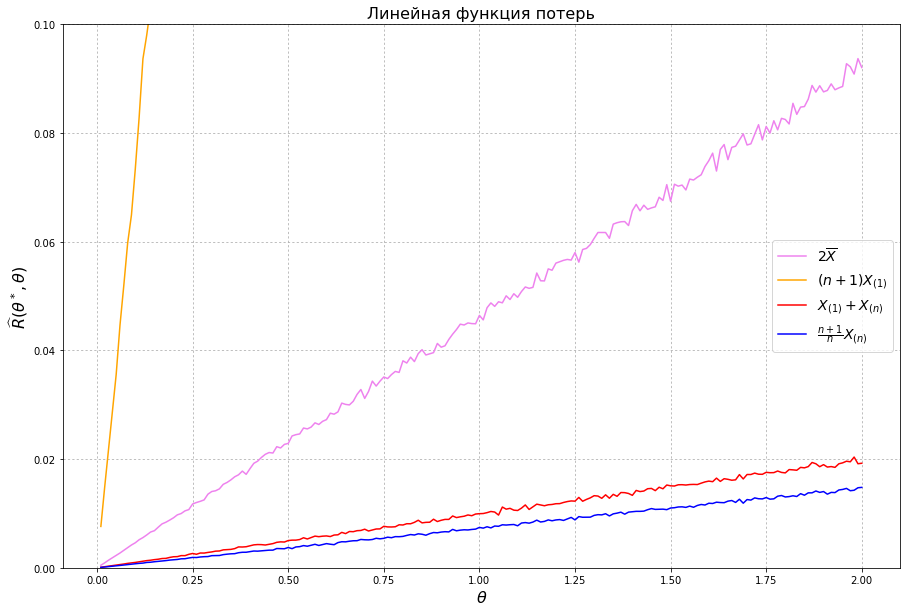

In [285]:
plt.figure(figsize=(15, 10))

plt.plot(np.arange(0.01, 2.01, 0.01), R1[0],
         color='violet', label='$2\\overline{X}$')
plt.plot(np.arange(0.01, 2.01, 0.01), R1[1],
         color='orange', label='$(n+1)X_{(1)}$')
plt.plot(np.arange(0.01, 2.01, 0.01), R1[2],
         color='red', label='$X_{(1)}+X_{(n)}$')
plt.plot(np.arange(0.01, 2.01, 0.01), R1[3],
         color='blue', label='$\\frac{n+1}{n} X_{(n)}$')

plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Линейная функция потерь', fontsize=16)
plt.ylim(0, 0.1)
plt.show()

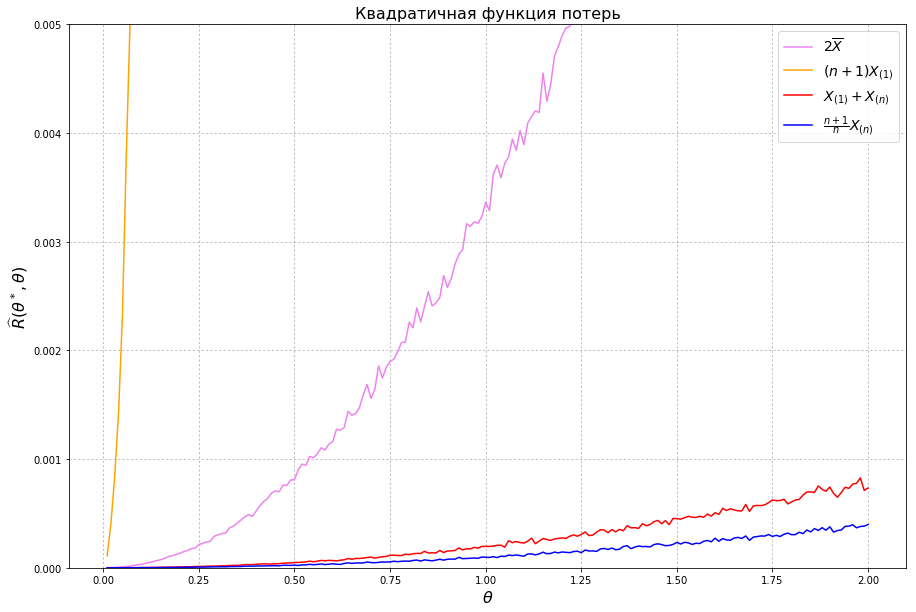

In [248]:
plt.figure(figsize=(15, 10))

plt.plot(np.arange(0.01, 2.01, 0.01), R2[0],
         color='violet', label='$2\\overline{X}$')
plt.plot(np.arange(0.01, 2.01, 0.01), R2[1],
         color='orange', label='$(n+1)X_{(1)}$')
plt.plot(np.arange(0.01, 2.01, 0.01), R2[2],
         color='red', label='$X_{(1)}+X_{(n)}$')
plt.plot(np.arange(0.01, 2.01, 0.01), R2[3],
         color='blue', label='$\\frac{n+1}{n} X_{(n)}$')

plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Квадратичная функция потерь', fontsize=16)
plt.ylim(0, 0.005)
plt.show()


Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** Оценка $\frac{n+1}{n} X_{(n)}$ оказалась лучше и в линейном, и в квадратичном подходах, т.к. ее функция риска принимает значения меньшие, чем у функций риска других оценок.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

In [198]:
from scipy.special import gamma

R1 = []
R2 = []
for k in np.arange(1, 6, 1):
    R1_k = []
    R2_k = []
    for tetta in np.arange(0.01, 2.01, 0.01):
        sample = sps.expon.rvs(size=(n, 2000), scale=1/tetta)
        estim = (gamma(k + 1) / (sample ** k).mean(axis=0)) ** (1/k)
        R1_k.append((np.absolute(estim - tetta)).sum() / 2000)
        R2_k.append(((estim - tetta) ** 2).sum() / 2000)
    R1.append(R1_k)
    R2.append(R2_k)

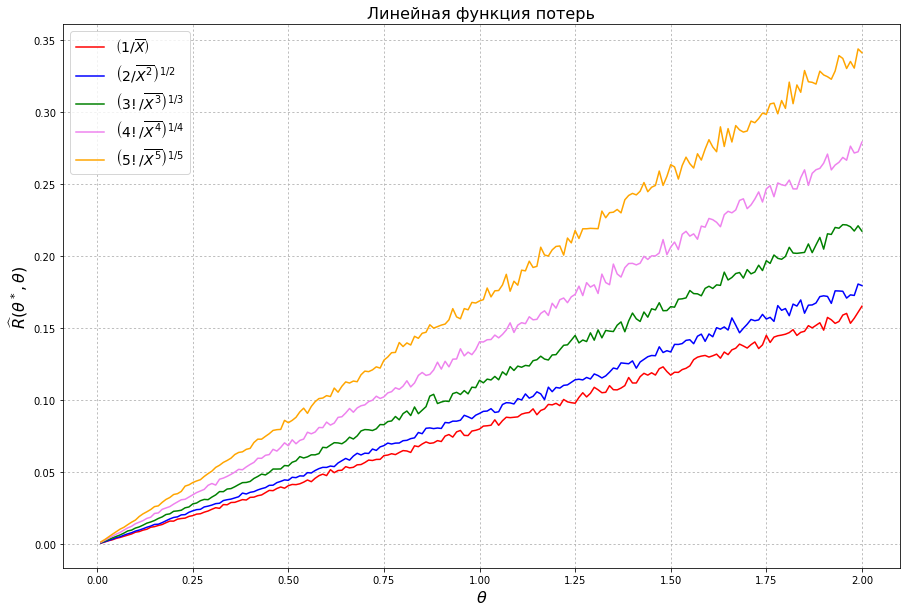

In [240]:
plt.figure(figsize=(15,10))
for k, plt_color, plt_label
in [(0, 'red', '$\\left(1 / \\overline{X}\\right)$'), 
    (1, 'blue', '$\\left(2 / \\overline{X^2}\\right)^{1/2}$'),
    (2, 'green', '$\\left(3! / \\overline{X^3}\\right)^{1/3}$'),
    (3, 'violet', '$\\left(4! / \\overline{X^4}\\right)^{1/4}$'),
    (4, 'orange', '$\\left(5! / \\overline{X^5}\\right)^{1/5}$')]:
    plt.plot(np.arange(0.01, 2.01, 0.01), R1[k], color=plt_color, label=plt_label)
    
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Линейная функция потерь', fontsize=16)
plt.show()

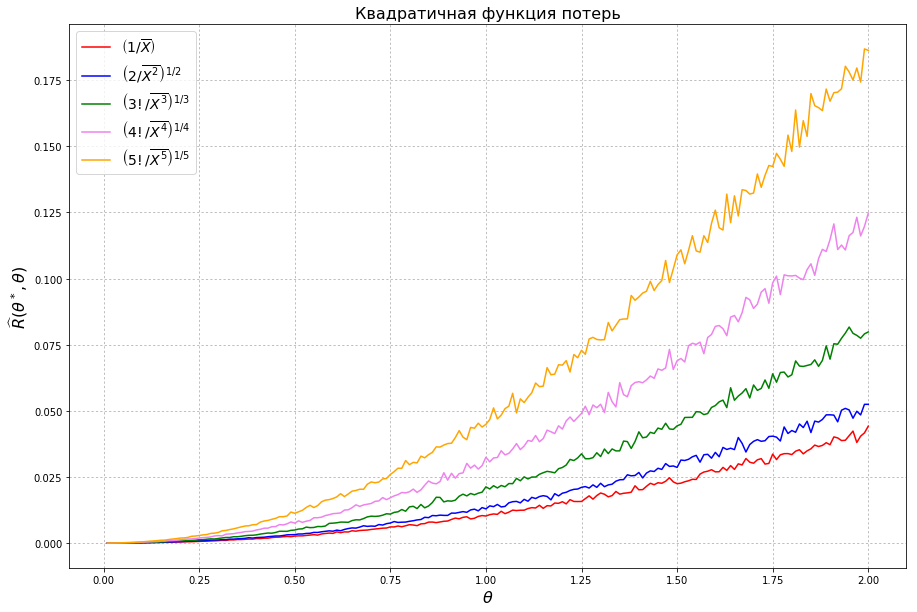

In [241]:
plt.figure(figsize=(15,10))
for k, plt_color, plt_label 
in [(0, 'red', '$\\left(1 / \\overline{X}\\right)$'), 
    (1, 'blue', '$\\left(2 / \\overline{X^2}\\right)^{1/2}$'),
    (2, 'green', '$\\left(3! / \\overline{X^3}\\right)^{1/3}$'),
    (3, 'violet', '$\\left(4! / \\overline{X^4}\\right)^{1/4}$'),
    (4, 'orange', '$\\left(5! / \\overline{X^5}\\right)^{1/5}$')]:
    plt.plot(np.arange(0.01, 2.01, 0.01), R2[k], color=plt_color, label=plt_label)
    
plt.grid(ls=':')
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
plt.legend(fontsize=14)
plt.title('Квадратичная функция потерь', fontsize=16)
plt.show()

**Вывод:** Оценка $\left(1 / \overline{X}\right)$ оказалась наилучшей и в линейном подходе, и в квадратичном.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

...

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

...

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.